# Langchain

`pip install langchain-openai`

In [2]:
import os
from dotenv import load_dotenv

load_dotenv()

True

In [3]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI()

In [11]:
llm.invoke("how can langsmith help with testing?")

AIMessage(content='Langsmith can help with testing by providing automated testing tools and frameworks that can be used to run tests on code written in different languages. These tools can help identify bugs and errors in the code, as well as ensure that the code meets the requirements and specifications set out for the project. Additionally, Langsmith can provide support for writing and executing test cases, analyzing test results, and tracking and managing testing activities. Overall, Langsmith can streamline the testing process and improve the quality and reliability of the software being developed.', response_metadata={'token_usage': {'completion_tokens': 103, 'prompt_tokens': 15, 'total_tokens': 118}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-4b392c97-42be-457b-98bc-d35be1dbe4a2-0', usage_metadata={'input_tokens': 15, 'output_tokens': 103, 'total_tokens': 118})

In [14]:
sentence = "이거 개재밌음"

prompt = f"""\
{sentence}를 '긍정', '부정'으로 판단해서 이를 '긍정','부정'으로 답변해줘    
"""

llm.invoke(prompt)

AIMessage(content='긍정', response_metadata={'token_usage': {'completion_tokens': 3, 'prompt_tokens': 52, 'total_tokens': 55}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-59d3bd3d-8771-4cae-92cd-6cb69e4a9e6d-0', usage_metadata={'input_tokens': 52, 'output_tokens': 3, 'total_tokens': 55})

In [ ]:
prompt = f"""\
# INSTRUCTION
- 당신은 긍/부정 분류기입니다.
- SENTENCE를 "긍정", "부정" 중 하나로 분류하세요.

# SENTENCE: {sentence}    
"""

---

In [4]:
import pandas as pd

In [5]:
df_comment = pd.read_csv("C:/Users/pps/Desktop/TIL/youtube_comments_crawling.csv", encoding= 'utf-8')

In [ ]:
# df_comment.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
prompt = f"""\
# INSTRUCTION
- 당신은 긍/부정 분류기입니다.
- SENTENCE를 "긍정", "부정" 중 하나로 분류하세요.

# SENTENCE: {sentence}
"""

NameError: name 'sentence' is not defined

In [7]:
from langchain_core.prompts import PromptTemplate

template = """\
# INSTRUCTION
- 당신은 긍/부정 분류기입니다.
- SENTENCE를 ["긍정", "부정"] 중 하나로 하나의 문자열로 분류하세요.

# SENTENCE: {sentence}
"""

prompt = PromptTemplate.from_template(template)
chain = prompt | llm



In [8]:
temp = []
for sentence in df_comment["댓글텍스트"]:
    pos_neg= chain.invoke({"sentence":sentence}).content
    temp.append(pos_neg)
temp

['부정',
 '긍정',
 '긍정',
 '긍정',
 '긍정',
 '부정',
 '긍정',
 '긍정',
 '부정',
 '긍정',
 '긍정',
 '긍정',
 '부정',
 '긍정',
 '긍정',
 '긍정',
 '긍정',
 '긍정',
 '긍정',
 '부정',
 '부정',
 '긍정',
 '긍정',
 '긍정',
 '"긍정"',
 '긍정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '"긍정"',
 '"긍정"',
 '긍정',
 '"긍정"',
 '긍정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '"긍정"',
 '긍정',
 '긍정',
 '"긍정"',
 '부정',
 '부정',
 '긍정',
 '긍정',
 '부정',
 '긍정',
 '긍정',
 '긍정',
 '긍정',
 '긍정',
 '"긍정"',
 '부정',
 '긍정',
 '부정',
 '긍정',
 '부정',
 '부정',
 '긍정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '긍정',
 '긍정',
 '긍정',
 '부정',
 '부정',
 '긍정',
 '부정',
 '긍정',
 '"긍정"',
 '부정',
 '긍정',
 '긍정',
 '부정',
 '부정',
 '부정',
 '부정',
 '긍정',
 '부정',
 '부정',
 '긍정',
 '부정',
 '긍정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '긍정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '긍정',
 '부정',
 '긍정',
 '부정',
 '부정',
 '긍정']

In [9]:
import re
temp_data = [re.sub(r'["]','',item) for item in temp]

In [10]:
df_comment["긍부정"] = temp_data

In [11]:
df_comment["댓글텍스트"] = df_comment["댓글텍스트"].replace('\n', '', regex=True)

In [12]:
df_comment['좋아요 수'] = df_comment['좋아요 수'].fillna(0)


In [14]:
df_comment.to_csv("./using_openapi_comment_posneg.csv")

---

## 유튜브 댓글의 긍/부정 데이터 분석

### 과제
1. 긍/부정 csv 저장
2. 긍/부정 개수 구하기
    - 막대 그래프 그리기
3. 워드 클라우드 그리기 전 `Counter` 사용 (`Okt`,`Kiwi` 중 선택)
    1. 명사
    2. 동사, 형용사(같이)

### 목표
- 데이터 분석을 통한 긍/부정 데이터 분석의 한계에 대해서 알아보자

---

### 1. 긍/ 부정 csv 저장

In [15]:
# "using_openapi_comment_posneg.csv"로 저장

---

### 2.1 긍/부정 개수 구하기

In [24]:
comment_emotion = df_comment.긍부정.value_counts()
comment_emotion['부정']

65

### 2.2 막대 그래프 그리기

In [23]:
# 한글 글꼴 설정
import matplotlib.pyplot as plt
import numpy as np
font_path = 'C:/Users/pps/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf'
font_name = plt.matplotlib.font_manager.FontProperties(fname=font_path).get_name()

plt.rcParams['font.family'] = font_name

In [54]:
def comment_emotion_bar(comment_emotion):
    x = np.arange(2)

    positive_emo = comment_emotion["긍정"]
    negative_emo = comment_emotion["부정"]

    y_axis = [positive_emo, negative_emo]
    x_axis = ["긍정 댓글", "부정 댓글"]
    plt.bar(x,y_axis)
    plt.xticks(x, x_axis)
    plt.show

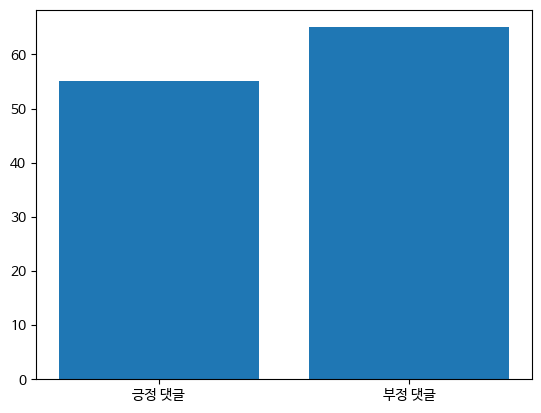

In [55]:
bar_comment_emo = comment_emotion_bar(comment_emotion)

---

### 3.1 명사 / 동사,형용사 구분하기

#### 댓글 텍스트 불러오기

In [29]:
comment_list = df_comment['댓글텍스트'].to_list()
comment_string = ''.join(str(s) for s in comment_list)

In [30]:
comment_string

'김하성의 영상엔 김하성이 한번도 등장하지 않는다.김하성의 야구엔 무안타의 감동이있다썸넬 김하성이 끝내기홈런친줄..ㅡㅡ김하성의 샌디에이고 썸네일 개강조 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 하성아 스포타임을 위해서라도 얼른 홈런날리자 ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ김하성의 무안타엔 감동이있다썸네일 제목 뽑은 거 보니 김하성 무안타 였나보군?진짜 잘 치네. 제구도 엄청 잘 된 공인데 기다렸다는 듯이 위로 걷어 올려버리는구만. 몸쪽으로 바짝 붙여서 가장 낮은 스트라이크존으로 뚝 떨어트린 공을......ㄷㄷㄷㄷ메이저리그 타자들이 무섭긴 무섭네.샌디에이고의 2경기 연속 끝내기 홈런에는 언제나 감동 감탄 환호 멋진 플레이가있다김하성4타수 무안타 ~~~김하성의 야구에는 낚시 썸네일과 무안타가 있다.이야... 분위기 너무 좋다... 게임할맛 나겠다....쫌 만 더....잘하자...2:46 이분 야구계 펠레 아니신가요?️"신부님들 야구엔 감동이 있다."샌디에이고 분위기 너무 좋다 이대로만가즈아!!!^^김하성의 야구엔 \'응원\'이 있다샌디에이고 요즘 야구 재미있게 하네^^김하성의 야구에는 안타가 없다두선수가 홈런 네방으로 끝내버리는군요. 타자라면 누구라도 꿈꾸는 굿바이홈런 참 멋집니다.2:24 캐스터 ㅋㅋㅋㅋ선수 보강 지리네진짜 스윙 시원하게한다김하성이 끝내기였으면 썸넬 제목은 ‘오늘도 터졌다 어썸킴! 샌디 승리를 견인하는 끝내기’샌디에고 가을야구 가자.샌디에이고의 야구엔 감동이 있다!샌디 올해엔 가을야구 가자 제발여름이라매...샌디 포수가 수비가 너무아쉬움..오늘도 홈에서 잡을수있었는데...제목 보니깐 무안타 무출루네. 센디에고 이틀연속 끝내기 홈런...누가 보면 김하성이 또 홈런친줄.. 교묘한 스포타임썸네일에 혼선이 있겠네요.얼핏보면 김하성이 홈런친줄언제꺼야?매드 메릴 미쳤네숨은 인물 찾기....김하성, 그는 어디에...무안타 맹활약!!첫조회인가 ㅎㅎ메릴 진짜 재능끝내기홈런 짜릿하겠다.와우 메릴 끝내기 짜릿하네3:07 김하성 잠깐 나오네요...nan김하성은....... 미국에 있다.김하성

---

#### 명사 분류하기

In [31]:
# 명사

from konlpy.tag import Okt
okt = Okt()

# Okt 명사 추출
def okt_noun_extractor(text):
    return okt.nouns(text)

In [38]:
comments_nouns = okt_noun_extractor(comment_string)


---

#### 동사, 형용사 분류하기

In [37]:
# 동사, 형용사 분류하기
from kiwipiepy import Kiwi
kiwi = Kiwi()

def kiwi_verb_adj_extractor(text):
    results = []
    result = kiwi.analyze(text)
    
    for token,pos,_,_ in result[0][0]:
        if len(token) != 1 and pos.startswith('VA') or pos.startswith('VV'):
            results.append(token)
    return results

In [39]:
comments_adj_verb = kiwi_verb_adj_extractor(comment_string)

In [61]:
comment_adj_verb_temp = list(map(lambda x : x + '다',comments_adj_verb))

---

### 3.2 Counter 써서 갯수 구하고 워드 클라우드로 시각화

#### 명사 워드 클라우드 시각화

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

def wordcloud_noun(noun_text):
    cnt = len(noun_text)
    counts = Counter(noun_text)
    tags_noun = counts.most_common(cnt)
    wc = WordCloud(font_path='C:/Users/pps/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf', background_color='white', width=800, height=600)
    cloud_noun = wc.generate_from_frequencies(dict(tags_noun))
    
    plt.figure(figsize = (10, 8))
    plt.axis('off')
    plt.imshow(cloud_noun)
    plt.show()
    

#### 동사, 형용사 워드 클라우드 시각화

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

def wordcloud_verb_adj(verb_adj_text):
    cnt = len(verb_adj_text)
    counts = Counter(verb_adj_text)
    tags_verb_adj = counts.most_common(cnt)
    wc = WordCloud(font_path='C:/Users/pps/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf', background_color='white', width=800, height=600)
    cloud_verb_adj = wc.generate_from_frequencies(dict(tags_verb_adj))
    
    plt.figure(figsize = (10, 8))
    plt.axis('off')
    plt.imshow(cloud_verb_adj)
    plt.show()
    

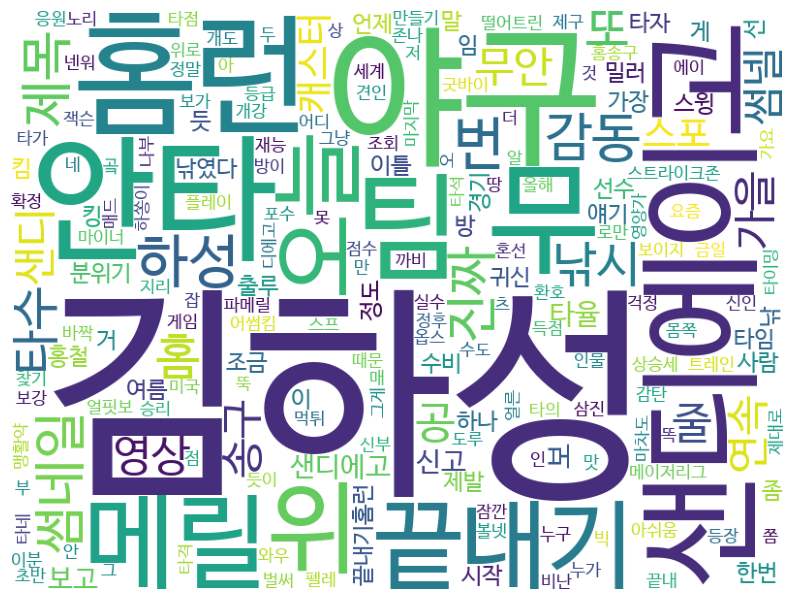

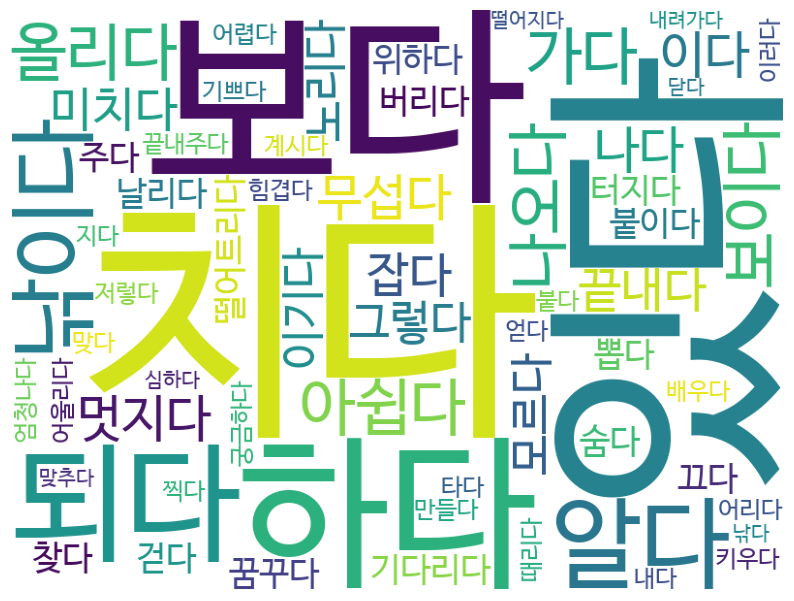

In [62]:
wc_noun = wordcloud_noun(comments_nouns)
wc_verb_adj = wordcloud_verb_adj(comment_adj_verb_temp)

---

## 긍/부정의 한계

In [59]:
comment_emotion

긍부정
부정    65
긍정    55
Name: count, dtype: int64

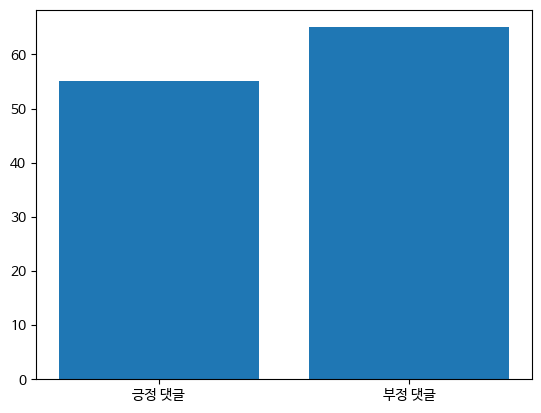

In [57]:
bar_comment_emo = comment_emotion_bar(comment_emotion)

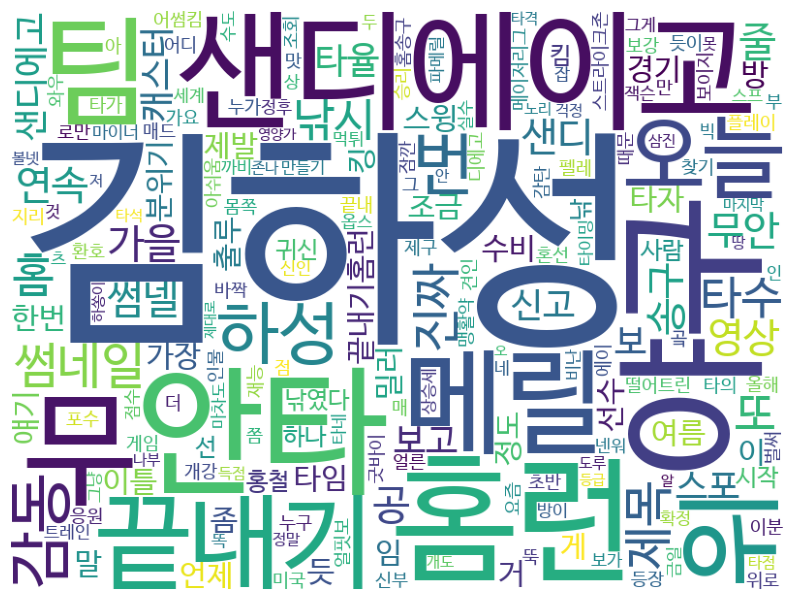

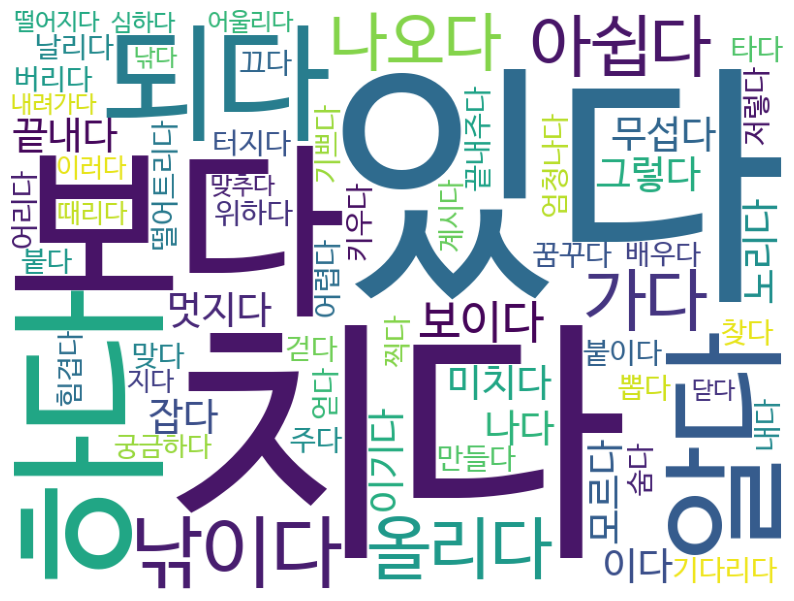

In [63]:
wc_noun = wordcloud_noun(comments_nouns)
wc_verb_adj = wordcloud_verb_adj(comment_adj_verb_temp)

---

## 결론

### 서론
- 목표: 이 영상에 대한 대중들의 평가를 알아보기 위한 것이다.
- 목표를 이루기 위한 과정
    1. 영상에 대한 댓글 웹 크롤링 실행
    2. 댓글 추출
    3. 댓글에 대한 긍/부정 평가
- 결과에 대한 가설
    - 이 영상은 긍정 55: 부정 65 로 대체로 부정적이다.
- 가설에 대한 오류
    - 워드 클라우드를 통해 긍/부정에 대한 평가가 영상 자체에 대한 평가가 아닌 경기 또는 선수 개인에 대한 평가까지 통합되어 있다.

### 오류에 대한 해결책 제시
- 영상의 긍/부정에 대한 평가를 주체를 정한다.
    - 영상에 대한 긍/부정
    - 선수에 대한 긍/부정
    - 경기에 대한 긍/부정

- 프롬프트를 이용해 대상에 대한 긍/부정을 출력한다.

In [90]:
import os
import pandas as pd
import json
from dotenv import load_dotenv

load_dotenv()

True

In [91]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI()

In [92]:
from langchain_core.prompts import PromptTemplate

template = """\
# INSTRUCTION
- 당신은 긍/부정 분류기입니다.
- 각 대상 '선수', '경기', '영상'에 대한 평가가 긍정적인지 부정적인지를 분류하세요.
- 대상에 대한 평가가 없는 경우 '-'을 표시하세요.
- 결과를 다음과 같은 딕셔너리 형식으로 출력하세요:

    "선수": "긍정/부정/-",
    "경기": "긍정/부정/-",
    "영상": "긍정/부정/-"

# SENTENCE: {sentence}
"""

prompt = PromptTemplate.from_template(template)
chain = prompt | llm

In [93]:
chain.invoke("이강인 선수가 축구를 잘한다.")

AIMessage(content='{\n    "선수": "긍정",\n    "경기": "-",\n    "영상": "-"\n}', response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 175, 'total_tokens': 202}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-db54dbb4-43e1-4711-97fb-cd6e66323c99-0', usage_metadata={'input_tokens': 175, 'output_tokens': 27, 'total_tokens': 202})

In [94]:
temp = {"선수": [], "경기": [], "영상":[]}
for sentence in df_comment["댓글텍스트"]:
    pos_neg= chain.invoke({"sentence":sentence})
    result = json.loads(pos_neg.content)
    temp["선수"].append(result["선수"])
    temp["경기"].append(result["경기"])
    temp["영상"].append(result["영상"])


In [95]:
df_comment["선수"] = temp["선수"]
df_comment["경기"] = temp["경기"]
df_comment["영상"] = temp["영상"]

In [82]:
for i in range(120):
    if temp["선수"][i] == "김하성(긍정)":
        print(i)

29
61


In [110]:
df_comment

,Unnamed: 0,UserID,댓글텍스트,좋아요 수,video_ID,긍부정,선수,경기,영상
0,0,@kimsoonsoo6004,김하성의 영상엔 김하성이 한번도 등장하지 않는다.,348.0,0BWScn_OWPk,부정,-,부정,부정
1,1,@user-nt9zc3bk5d,김하성의 야구엔 무안타의 감동이있다,191.0,0BWScn_OWPk,긍정,긍정,-,-
2,2,@user-hw6tt8ke1n,썸넬 김하성이 끝내기홈런친줄..ㅡㅡ,105.0,0BWScn_OWPk,긍정,긍정,부정,-
3,3,@user-ff9po2nn6s,김하성의 샌디에이고 썸네일 개강조 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 하성아 스포타임을...,123.0,0BWScn_OWPk,긍정,-,긍정,긍정
4,4,@user-th3mk7kc4y,김하성의 무안타엔 감동이있다,79.0,0BWScn_OWPk,긍정,긍정,-,-
...,...,...,...,...,...,...,...,...,...
115,115,@user-oo6cg6hi1q,솔라노 메릴이 다했네…,0.0,0BWScn_OWPk,부정,긍정,-,-
116,116,@user-dh6nz4oh9m,상대가 오클랜드인데 가을야구 할라면 당연히 이겨야지,0.0,0BWScn_OWPk,긍정,긍정,긍정,-
117,117,@alephhan6742,제목 낚시는 가차 없이 스팸으로 신고해주는 센스가 필요합니다. 많은 사람이 신고해야...,0.0,0BWScn_OWPk,부정,-,부정,부정
118,118,@user-fc4nm2jv3d,한국에서 운영하는 방송의 하이라이트에 김하성이 한번도 안나오는 거 보면 오늘 겜에는...,0.0,0BWScn_OWPk,부정,부정,-,부정


In [109]:
df_comment.to_csv("comment_emo_plyer_match_vid.csv")

---

### 1. 사람들은 댓글로 얼마나 많은 긍/부정 평가를 하는지 막대그래프로 표시

In [112]:
player_emotion=df_comment["선수"].value_counts()
match_emotion = df_comment["경기"].value_counts()
video_emotion = df_comment["영상"].value_counts()

In [114]:
player_emotion



선수
긍정    57
부정    38
-     25
Name: count, dtype: int64

In [115]:
match_emotion

경기
-     88
부정    16
긍정    16
Name: count, dtype: int64

In [116]:
video_emotion

영상
-     64
부정    34
긍정    22
Name: count, dtype: int64

In [111]:
# 한글 글꼴 설정
import matplotlib.pyplot as plt
import numpy as np
font_path = 'C:/Users/pps/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf'
font_name = plt.matplotlib.font_manager.FontProperties(fname=font_path).get_name()

plt.rcParams['font.family'] = font_name

In [121]:
def comment_subject_bar(player_emotion,match_emotion,video_emotion):
    x = np.arange(3)

    # positive_emo = comment_emotion["긍정"]
    # negative_emo = comment_emotion["부정"]
    
    player_semo = player_emotion["긍정"] + player_emotion["부정"]
    match_semo = match_emotion["긍정"] + match_emotion["부정"]
    video_semo = video_emotion["긍정"] + video_emotion["긍정"]
    
    

    y_axis = [player_semo, match_semo, video_semo]
    x_axis = ["선수", "경기","영상"]
    plt.bar(x,y_axis)
    plt.xticks(x, x_axis)
    plt.show

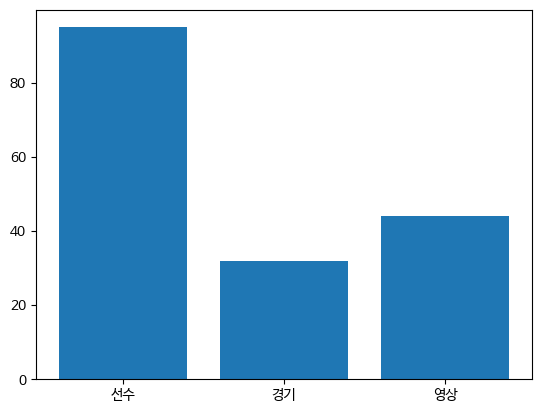

In [122]:
comment_subject_bar(player_emotion,match_emotion,video_emotion)

---

### 2. 각 카테고리별 긍/부정이 어떤가?

In [131]:
print(player_emotion)
print(match_emotion)
print(video_emotion)

선수
긍정    57
부정    38
-     25
Name: count, dtype: int64
경기
-     88
부정    16
긍정    16
Name: count, dtype: int64
영상
-     64
부정    34
긍정    22
Name: count, dtype: int64


---

### 3. 부정 평가가 많은 카테고리 -> 어떤 키워드가 있었는지 확인하기

1. 부정이 많은 카테고리 확인하기
2. 카테고리에 부정인것만 df로 추출
    - 워드만 추출 -> 딕셔너리
3. 워드 클라우드 "명사"

- 부정이 많은 카테고리 = 선수

In [157]:
player_negcomment = {"부정":[]}

for i in range(len(df_comment)):
    if df_comment["선수"][i] == "부정":
        player_negcomment["부정"].append(df_comment["댓글텍스트"][i])


In [161]:
for key, value in player_negcomment.items():
    player_negcomment[key] = ', '.join(value)

In [165]:
player_negstring= player_negcomment.get('부정')

In [166]:
player_negstring

'썸네일 제목 뽑은 거 보니 김하성 무안타 였나보군?, 김하성4타수 무안타 ~~~, 쫌 만 더....잘하자..., 2:46 이분 야구계 펠레 아니신가요?, 샌디에이고 분위기 너무 좋다 이대로만가즈아!!!^^, 샌디 포수가 수비가 너무아쉬움..오늘도 홈에서 잡을수있었는데..., 매드 메릴 미쳤네, 김하성 부정확한 홈송구 때문에 한점 줬구나, 김하성의 야구에 오늘은 보이지가 않는다, 김하성은 2할초반 수비아니면 벌써 마이너, 세계적인팀끝내주는팀la다졌으, 빅트레인이 엄청난 상승세를 타게될거 같다고 말하면.. ㄷㄷㄷ 그게 아니길.., 진짜 똑딱이 안타만 치네 ㅋㅋ 꾸준하질 않어.., 김하성의 샌디에이고에는 김하성이 없다., 물론 쉽진 않았지만, 조금만 정확했다면 타이밍 상으로는 잡을 수도 있었을 듯한 홈 송구 두 번이 김하성인 것 같음ㅇㅇ 실수했다고 비난하는 게 아니라 그냥 조금 아쉽다 정도의 얘기임 ㅇㅇ, 4타수 무안타 해서 제목 만들기 어려운건 알겠는데 김하성의 샌디에이고는 좀 그렇지 않나? ㅋㅋ, 김하성 타격 정말 걱정된다, 킹하성타율 .222(팀 13위)홈런      9(팀   4위)안타    53(팀  7위)타점    34(팀  4위)득점   36(팀  4위)도루   14(팀  1위)볼넷   41(팀  1위)삼진   41(팀  4위), 땅하성 타석은 철저하게 안 보여주는거 보니까 오늘 안타 1개도 못 쳤나부네ㅋㅋㅋㅋㅋ, 김하성 오늘의 영양가 D등급, 우리  하성킹이 잘하지  않으면  하나도  아니  기쁩니다 ㅠㅠ, 타선좀 올려주면 귀신같은 4타수 무안타에 감동란이 있다., 김하성의 야구에는 침묵이 있다, 메이슨 밀러한테 쳤을줄은 몰랐네 ㅋㅋ, 김하성의 야구엔 편집당함이 있다, 샌디에이고의 김하성 아님?ㅋㅋㅋㅋㅋ김하성의 샌디에이고???, 김하성 홈 송구 두번이나 병맛나게...해서, 하성킴 타율좀 올려야 겠더라.. 조만간 1할 될거같아, 아니 언제부터 샌디에고가 김하성의 샌디에고가 된거냐 ㅋㅋㅋㅋㅋㅋㅋㅋ, 낚였다 김하성이 쳤다는 줄 ㅠㅠ, 혹시 궁금하신분 계실

---

### 워드 클라우드 만들기 (명사)

In [167]:
# 명사
from konlpy.tag import Okt
okt = Okt()

# Okt 명사 추출
def okt_noun_extractor(text):
    return okt.nouns(text)

In [168]:
player_negNoun = okt_noun_extractor(player_negstring)

In [169]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

def wordcloud_noun(noun_text):
    cnt = len(noun_text)
    counts = Counter(noun_text)
    tags_noun = counts.most_common(cnt)
    wc = WordCloud(font_path='C:/Users/pps/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf', background_color='white', width=800, height=600)
    cloud_noun = wc.generate_from_frequencies(dict(tags_noun))
    
    plt.figure(figsize = (10, 8))
    plt.axis('off')
    plt.imshow(cloud_noun)
    plt.show()

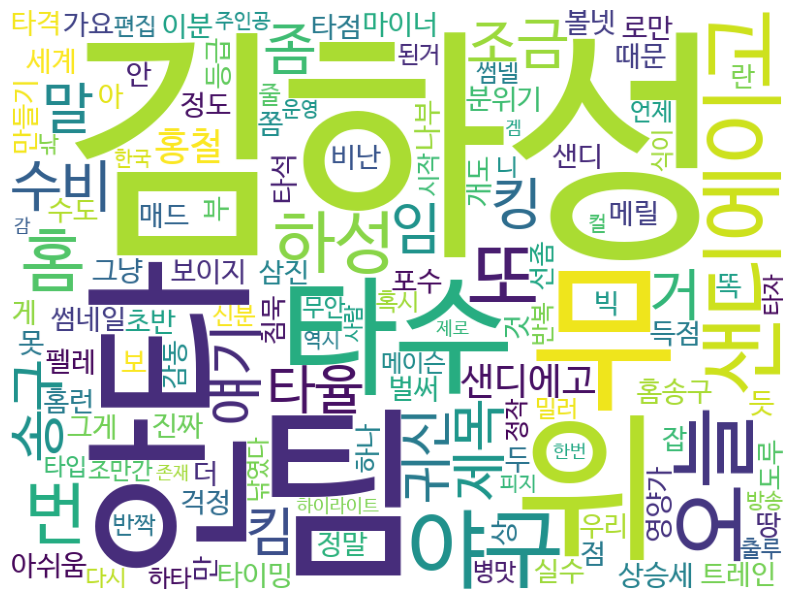

In [170]:
wordcloud_noun(player_negNoun)

### 내일까지 해야 할 일
- 이 파일에 있는 것으로 모든 것을 정리하는 보고서를 만들어야 한다.
- 일단 처음 시작으로
    - 유튜브 영상에 대한 대중의 평가를 알고 싶어 댓글들을 크롤링 했었다.
    - 크롤링 하여 댓글들을 추출한다.
    - 이 댓글들을 openapi 프롬프트로 돌려서 댓글들에 대한 긍/부정평가를 했다.
    - 그 결과, 이 영상은 긍정 55: 부정 65로 전반적으로 부정적인 영상이 되었다.
    - 하지만 댓글들에 대한 워드 클라우드 시각화를 해보니
    - 영상에 대한 평가뿐만 아니라 선수, 경기쪽으로도 통합되어 긍/부정 평가를 하고 있었다.
- 중반
    - 이에 대해 긍/부정 평가를 세분화하여 선수, 경기, 영상 카테고리들로 나눴다.
    - 그리고 댓글들을 3개의 카테고리로 긍/부정 평가를 하였다.
    - 이후 확인해보니 선수에 대한 긍/부정 평가가 많았다.
    - 선수에 긍/부정 평가는 긍정 57: 부정 38로 전반적으로 긍정적인 댓글들이 많았다.
    - 이를 통해 이 영상은 선수에 대한 긍정적인 평가를 주로 하고 있다.
    - 마지막으로 이를 시각화해서 나타낸다면 선수에 대한 어떤 부분을 중점적으로 칭찬하고 있는지에 대해 나온다.
- 결과
    - 결국 이 영상에 대한 사람들의 긍/부정적인 평가는 전체적으로는 부정적인 면이 많다고 볼 수 있지만
    - 세분화해서 보게 된다면 긍/부정 평가가 비등한 부분이 있고 특히 선수카테고리는 긍정적인 평가가 더 많다는 것을 알 수 있다.
    - 사람들은 "키워드"에 대해서 선수에 대한 긍정적인 평가가 많았다.